In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Example: Sine Wave Reconstruction

In [3]:
# Model Definition
class SineRNN(nn.Module):
  def __init__(self, p = 0.5):
    super(SineRNN, self).__init__()
    self.rnn_layer = nn.RNN(input_size = 1, hidden_size = 128)
    self.out_layer = nn.Linear(in_features = 128, out_features = 1)
    self.p = p #Whether to use actual seq or output for next step
    
  def forward(self,seq, h = None):
        out = []
        X_in = torch.unsqueeze(seq[0],0)
        for X in seq:
            if np.random.rand()>self.p: #Use teacher forcing
                X_in = X.unsqueeze(dim = 0)
            tmp, h = self.rnn_layer(X_in, h)
            X_in = self.out_layer(tmp)
            out.append(X_in)
        return torch.stack(out).squeeze(1), h

In [4]:
seq = SineRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(seq.parameters(), lr=0.001)
max_iters = 200
train_loss = []
for i in range(max_iters):
    data = np.sin(np.linspace(0,10,100)+2*np.pi*np.random.rand())
    xs = data[:-1]
    ys = data[1:]
    X = torch.Tensor(xs).view(-1,1,1)
    y = torch.Tensor(ys)
    if i%100==0:
        seq.p = min(seq.p+0.1,0.85)  # encourage training longer term predictions
    optimizer.zero_grad()
    rnn_out,_ = seq(X)
    loss = criterion(rnn_out[20:].view(-1),y[20:])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    if i%500 == 0:
        print(f"i {i}, loss {loss.data:.4f}")

i 0, loss 0.5150


Validation Loss: 1.2412834167480469


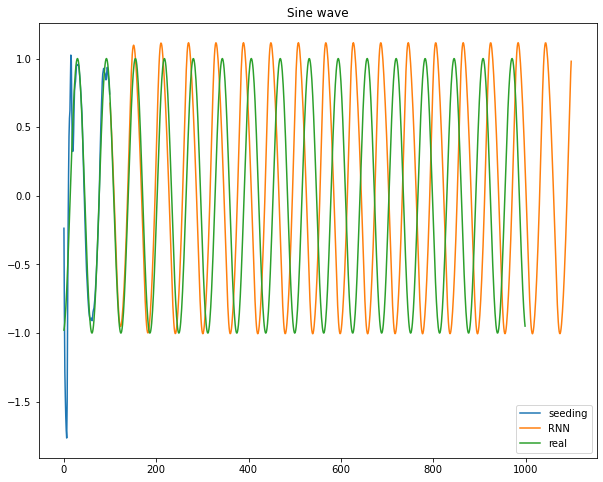

In [5]:
from matplotlib import pyplot as plt

y = np.sin(np.linspace(0,100,1000)+2*np.pi*np.random.rand())
X = torch.Tensor(y)[:100].view(-1,1,1)
model_out,h = seq(X)
preds = []
pred = model_out[-1].view(1,1,1)
for i in range(1000):
    pred,h = seq(pred,h)
    preds.append(pred.data.numpy().ravel()[0])

plt.figure(figsize=[10,8])
xs = np.arange(model_out.size(0))
plt.plot(xs,model_out.data.numpy().ravel())
xs = np.arange(1000)+len(xs)
plt.plot(xs,preds)
plt.plot(y)
plt.legend(['seeding','RNN','real'])
plt.title('Sine wave')
val_loss = criterion(torch.Tensor(preds[:-100]), torch.Tensor(y[100:]))
print(f'Validation Loss: {val_loss}')

## Exercise: Cosine Generation

### Example generation of cosines with different amplitudes

Text(0.5, 1.0, 'Cosine: Random shifts and amplitudes')

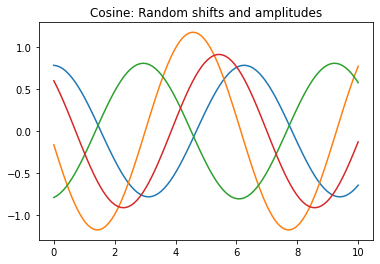

In [6]:
f = plt.figure()
for i in range(4):
  x = np.linspace(0,10,100)+2*np.pi*np.random.rand()
  amp = np.random.rand()+0.5
  y = amp*np.cos(x)
  plt.plot(np.linspace(0,10,100), y)
plt.title('Cosine: Random shifts and amplitudes')

In [7]:
#Set Hyperaparameters

#Generate Train, Val data


#Generate Test data

In [10]:
# Model Definition
class CosineRNN(nn.Module):
  def __init__(self, p = 0.5, hidden_size = 128):
    super(CosineRNN, self).__init__()
    self.rnn_layer = nn.RNN(input_size = 1, hidden_size = hidden_size)
    self.out_layer = nn.Linear(in_features = 128, out_features = 1)
    self.p = p #Whether to use actual seq or output for next step
    
  def forward(self,seq, h = None):
        out = []
        X_in = torch.unsqueeze(seq[0],0)
        for X in seq:
            if np.random.rand()>self.p: #Use teacher forcing
                X_in = X.unsqueeze(dim = 0)
            tmp, h = self.rnn_layer(X_in, h)
            X_in = self.out_layer(tmp)
            out.append(X_in)
        return torch.stack(out).squeeze(1), h

In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
seq = CosineRNN(hidden_size=128).to(device)
criterion = nn.MSELoss()
train_data = []
optimizer = optim.Adam(seq.parameters(), lr=0.001)
max_iters = 10000
train_loss = []
for i in range(max_iters):
    amp = np.random.rand()+0.5
    data = amp * np.cos(np.linspace(0,10,100)+2*np.pi*np.random.rand())
    xs = data[:-1]
    ys = data[1:]
    X = torch.Tensor(xs).view(-1,1,1).to(device)
    y = torch.Tensor(ys).to(device)
    if i%100==0:
        seq.p = min(seq.p+0.1,0.85)  # encourage training longer term predictions
    optimizer.zero_grad()
    rnn_out,_ = seq(X)
    loss = criterion(rnn_out[20:].view(-1),y[20:])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    if i%500 == 0:
        print(f"i {i}, loss {loss.data:.4f}")

i 0, loss 0.3425
i 500, loss 0.2071
i 1000, loss 0.6436
i 1500, loss 0.0122
i 2000, loss 0.1291
i 2500, loss 0.2010
i 3000, loss 0.0350
i 3500, loss 0.0347
i 4000, loss 0.1481
i 4500, loss 0.1797
i 5000, loss 0.0397
i 5500, loss 0.0028
i 6000, loss 0.0252
i 6500, loss 0.0623
i 7000, loss 0.0324
i 7500, loss 0.0012
i 8000, loss 0.0027
i 8500, loss 0.0120
i 9000, loss 0.0792
i 9500, loss 0.0022


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
seq = CosineRNN(hidden_size=128).to(device)
criterion = nn.MSELoss()
train_data = []
optimizer = optim.Adam(seq.parameters(), lr=0.00001)
max_iters = 10000
train_loss = []
for i in range(max_iters):
    amp = np.random.rand()+0.5
    data = amp * np.cos(np.linspace(0,10,100)+2*np.pi*np.random.rand())
    xs = data[:-1]
    ys = data[1:]
    X = torch.Tensor(xs).view(-1,1,1).to(device)
    y = torch.Tensor(ys).to(device)
    if i%100==0:
        seq.p = min(seq.p+0.1,0.85)  # encourage training longer term predictions
    optimizer.zero_grad()
    rnn_out,_ = seq(X)
    loss = criterion(rnn_out[20:].view(-1),y[20:])
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    if i%500 == 0:
        print(f"i {i}, loss {loss.data:.4f}")

In [19]:
from matplotlib import pyplot as plt
min_value = float("inf")
val_data_min = -1
val_data_max = 1
max_value = float("-inf")
val_data = []
for _ in range(1000):
    y = np.cos(np.linspace(0,100,1000)+2*np.pi*np.random.rand())
    X = torch.Tensor(y)[:100].view(-1,1,1).to(device)
    model_out,h = seq(X)
    preds = []
    pred = model_out[-1].view(1,1,1)
    for i in range(1000):
        pred,h = seq(pred,h)
        preds.append(pred.cpu().data.numpy().ravel()[0])

    plt.figure(figsize=[10,8])
    xst = xs = np.arange(model_out.size(0))
    
    ys = model_out.cpu().data.numpy().ravel()
    plt.plot(xs, ys)
    xs = np.arange(1000)+len(xs)
    plt.plot(xs,preds)
    plt.plot(y)
    plt.legend(['seeding','RNN','real'])
    plt.title('Sine wave')
    
    val_loss = criterion(torch.Tensor(preds[:-100]), torch.Tensor(y[100:]))
    if min_value > val_loss:

        val_data_min = ((xst, ys, xs, preds, y, val_loss))
    if min_value > val_loss:
        val_data_max = ((xst, ys, xs, preds, y, val_loss))
        
    print(f'Validation Loss: {val_loss}')

Validation Loss: 1.0999162197113037
Validation Loss: 1.085898756980896
Validation Loss: 1.093258023262024
Validation Loss: 1.0868778228759766
Validation Loss: 1.0882664918899536
Validation Loss: 1.1025604009628296
Validation Loss: 1.112141489982605
Validation Loss: 1.0949037075042725
Validation Loss: 1.09389066696167
Validation Loss: 1.09449303150177
Validation Loss: 1.0868265628814697
Validation Loss: 1.0900546312332153
Validation Loss: 1.0879957675933838
Validation Loss: 1.0942236185073853
Validation Loss: 1.0958856344223022
Validation Loss: 1.0935227870941162
Validation Loss: 1.0891157388687134
Validation Loss: 1.096765398979187
Validation Loss: 1.090688705444336
Validation Loss: 1.080803394317627


/tmp/ipykernel_456/3916896533.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,8])


Validation Loss: 1.1226115226745605
Validation Loss: 1.0967687368392944
Validation Loss: 1.139080286026001
Validation Loss: 1.1041154861450195
Validation Loss: 1.1198118925094604
Validation Loss: 1.0840997695922852
Validation Loss: 1.0748443603515625
Validation Loss: 1.0621578693389893
Validation Loss: 1.0904568433761597
Validation Loss: 1.0876632928848267
Validation Loss: 1.0690388679504395
Validation Loss: 1.074711799621582
Validation Loss: 1.0914555788040161
Validation Loss: 1.122222900390625
Validation Loss: 1.0922685861587524
Validation Loss: 1.0996166467666626
Validation Loss: 1.083801507949829
Validation Loss: 1.077170491218567
Validation Loss: 1.1133090257644653
Validation Loss: 1.0598465204238892
Validation Loss: 1.0894945859909058
Validation Loss: 1.064644694328308
Validation Loss: 1.0966589450836182
Validation Loss: 1.0949580669403076
Validation Loss: 1.0837225914001465
Validation Loss: 1.1115741729736328
Validation Loss: 1.0925174951553345
Validation Loss: 1.092416405677795